In [1]:
# Essentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Cleaning
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Mathing
import math

### Data cleaning

In [2]:
class ModelData():
    def __init__(self):
        ## Import Raw Datasets
        self.data = pd.read_csv('./datasets/train.csv')
        self.data_raw = self.data.copy()
        self.testing_data = pd.read_csv('./datasets/test.csv')
        
        ## Clean data
        column_dict = {
                        'Id': 'id',
                        'PID': 'pid',
                        'MS SubClass': 'ms_subclass',
                        'MS Zoning': 'ms_zoning',
                        'Lot Frontage': 'frontage',
                        'Lot Area': 'lot_sqft',
                        'Street': 'street_material',
                        'Alley': 'alley',
                        'Lot Shape': 'shape',
                        'Land Contour': 'contour',
                        'Utilities': 'utilities',
                        'Lot Config': 'config',
                        'Land Slope': 'slope',
                        'Neighborhood': 'neighborhood',
                        'Condition 1': 'cond_1',
                        'Condition 2': 'cond_2',
                        'Bldg Type': 'type',
                        'House Style': 'style',
                        'Overall Qual': 'quality',
                        'Overall Cond': 'condition',
                        'Year Built': 'year',
                        'Year Remod/Add': 'remod_year',
                        'Roof Style': 'roof',
                        'Roof Matl': 'roof_mat',
                        'Exterior 1st': 'ext_1',
                        'Exterior 2nd': 'ext_2',
                        'Mas Vnr Type': 'mas_vnr_type',
                        'Mas Vnr Area': 'mas_vnr_area',
                        'Exter Qual': 'exter_qual',
                        'Exter Cond': 'exter_cond',
                        'Foundation': 'foundation',
                        'Bsmt Qual': 'basement_qual',
                        'Bsmt Cond': 'basement_cond',
                        'Bsmt Exposure': 'basement_exposure',
                        'BsmtFin Type 1': 'basement_fin_1',
                        'BsmtFin SF 1': 'basement_fin_sqft_1',
                        'BsmtFin Type 2': 'basement_fin_2',
                        'BsmtFin SF 2': 'basement_fin_sqft_2',
                        'Bsmt Unf SF': 'basement_unfin_sqft',
                        'Total Bsmt SF': 'total_basement_sqft',
                        'Heating': 'heating',
                        'Heating QC': 'heating_qc',
                        'Central Air': 'ac',
                        'Electrical': 'electrical',
                        '1st Flr SF': 'sqft_1',
                        '2nd Flr SF': 'sqft_2',
                        'Low Qual Fin SF': 'low_qual_sqft',
                        'Gr Liv Area': 'gr_living_sqft',
                        'Bsmt Full Bath': 'basement_bath',
                        'Bsmt Half Bath': 'basement_half_bath',
                        'Full Bath': 'full_bath',
                        'Half Bath': 'half_bath',
                        'Bedroom AbvGr': 'bed',
                        'Kitchen AbvGr': 'kitchen',
                        'Kitchen Qual': 'kitchen_qual',
                        'TotRms AbvGrd': 'rooms_total',
                        'Functional': 'functional',
                        'Fireplaces': 'fireplaces',
                        'Fireplace Qu': 'fireplace_qual',
                        'Garage Type': 'garage_type',
                        'Garage Yr Blt': 'garage_year',
                        'Garage Finish': 'garage_finish',
                        'Garage Cars': 'garage_size',
                        'Garage Area': 'garage_sqft',
                        'Garage Qual': 'garage_qual',
                        'Garage Cond': 'garage_cond',
                        'Paved Drive': 'paved_drive',
                        'Wood Deck SF': 'deck_wood_sqft',
                        'Open Porch SF': 'porch_sqft',
                        'Enclosed Porch': 'porch_enc_sqft',
                        '3Ssn Porch': 'porch_3_ssn',
                        'Screen Porch': 'porch_screened',
                        'Pool Area': 'pool_sqft',
                        'Pool QC': 'pool_qc',
                        'Fence': 'fence',
                        'Misc Feature': 'misc',
                        'Misc Val': 'misc_sqft',
                        'Mo Sold': 'sold_month',
                        'Yr Sold': 'sold_year',
                        'Sale Type': 'sale_type',
                        'SalePrice': 'price'
                    }
        self.data.rename(columns=column_dict, inplace=True)
        self.testing_data.rename(columns=column_dict, inplace=True)
        
        ##############################################################
        # Data cleaning

        ## Fill Missing Values
        # Impute missing data by property type
        for c in ['frontage']:
        # sets index to type, makes a dict of median values of target var based on group by category, then applies that grouped median to null values of target var and saves in place
            self.data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]
            self.testing_data[c] = self.data.set_index(['type'])[c].fillna(self.data[['type', c]].groupby(['type']).median().to_dict()[c]).reset_index()[c]

        # Fill Missing Data
        # Categorical
        for c in ['mas_vnr_type', 'alley']:
            self.data[c].fillna('None', inplace=True)
            self.testing_data[c].fillna('None', inplace=True)

        # Numeric
        for c in ['mas_vnr_area', 'basement_fin_sqft_1', 'basement_fin_sqft_2', 'basement_unfin_sqft', 'total_basement_sqft', 'basement_bath', 'basement_half_bath',
                  'garage_size', 'garage_sqft']:
            self.data[c].fillna(0, inplace=True)
            self.testing_data[c].fillna(0, inplace=True)


        # garage_year (with outlier / error)
        self.data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.testing_data['garage_year'].fillna(self.data[self.data['garage_year'].notna()]['garage_year'].min(), inplace=True)
        self.data.at[1699,'garage_year'] = 2006 # incorrect data, changing to year property was built
        # sqft features are likely entered incorrectly. imputed more likely values below. imputed value is 1822
        self.data.at[960,'gr_living_sqft'] = 1822
        self.data.at[1885,'gr_living_sqft'] = 1822
        # misc
        self.data.drop(columns=['misc'], inplace=True)
        self.testing_data.drop(columns=['misc'], inplace=True)
        # utilities
        self.data.drop(columns=['utilities'], inplace=True)
        self.testing_data.drop(columns=['utilities'], inplace=True)
        # roof_mat
        self.data.drop(columns=['roof_mat'], inplace=True)
        self.testing_data.drop(columns=['roof_mat'], inplace=True)
        # ext 1 & 2
        self.data.drop(columns=['ext_1', 'ext_2'], inplace=True)
        self.testing_data.drop(columns=['ext_1', 'ext_2'], inplace=True)

        # Ordinal Encoding
        enc = OrdinalEncoder(categories=[[np.NaN, 'Po', 'Fa', 'TA', 'Gd', 'Ex']])
        # All the categories in the list are logged in the original data dictonary as ordinal. They follow a simple logic.
        for c in ['basement_qual', 'basement_cond', 'heating_qc', 'kitchen_qual', 'fireplace_qual', 'garage_qual', 'garage_cond', 'pool_qc', 'exter_qual', 'exter_cond']:
            self.data[[c]] = enc.fit_transform(self.data[[c]])
            self.data[c].fillna(0, inplace=True)

            self.testing_data[[c]] = enc.fit_transform(self.testing_data[[c]])
            self.testing_data[c].fillna(0, inplace=True)
        
        self.data['basement_exposure'] = self.data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})
        self.testing_data['basement_exposure'] = self.testing_data['basement_exposure'].map({'Gd':4, 'Av':3, 'Mn': 2, 'No':1, np.NaN:0})

        self.data['basement_fin_1'] = self.data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_1'] = self.testing_data['basement_fin_1'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        
        self.data['basement_fin_2'] = self.data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})
        self.testing_data['basement_fin_2'] = self.testing_data['basement_fin_2'].map({'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, np.NaN:0})

        self.data['garage_finish'] = self.data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})
        self.testing_data['garage_finish'] = self.testing_data['garage_finish'].map({np.NaN:0, 'NA':0, 'Unf':1, 'RFn':2, 'Fin':3})

        self.data['fence'] = self.data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})
        self.testing_data['fence'] = self.testing_data['fence'].map({'GdPrv':4, 'MnPrv':3, 'GdWo':2, 'MnWw':1, 'NA':0, np.NaN:0})

        self.data['electrical'] = self.data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})
        self.testing_data['electrical'] = self.testing_data['electrical'].map({np.NaN:0, 'Mix':1, 'FuseP':2, 'FuseF':3, 'FuseA':4, 'SBrkr':5})

        self.data['shape'] = self.data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})
        self.testing_data['shape'] = self.testing_data['shape'].map({'IR3':0, 'IR2':1, 'IR1':2, 'Reg':3, np.NaN:0})

        # flat land is usable land. following a basic assumption
        self.data['slope'] = self.data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})
        self.testing_data['slope'] = self.testing_data['slope'].map({'Sev':0, 'Mod':1, 'Gtl':2, np.NaN:1})

        # nobody wants to live near a railroad or on a busy street. Weights are applied to suit.
        self.data['cond_1'] = self.data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['cond_2'] = self.data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.data['conds'] = self.data[['cond_1', 'cond_2']].max(axis=1)
        self.data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)
        self.testing_data['cond_1'] = self.testing_data['cond_1'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['cond_2'] = self.testing_data['cond_2'].map({'Norm':1, 'Feedr':1, 'Artery':2, 'RRAn':3, 'PosN':0, 'RRAe':3, 'PosA':0, 'RRNn':3, 'RRNe':3})
        self.testing_data['conds'] = self.testing_data[['cond_1', 'cond_2']].max(axis=1)
        self.testing_data.drop(['cond_1', 'cond_2'], axis=1, inplace=True)

        self.data['style'] = self.data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})
        self.testing_data['style'] = self.testing_data['style'].map({'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1})

        self.data['foundation'] = self.data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})
        self.testing_data['foundation'] = self.testing_data['foundation'].map({'Slab':0, 'Stone':1, 'BrkTil':2, 'CBlock':3, 'PConc':4, 'Wood':5})

        self.data['heating'] = self.data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})
        self.testing_data['heating'] = self.testing_data['heating'].map({'GasW':1, 'Grav':0, 'OthW':0, 'Wall':0, 'Floor':0, 'GasA':2})

        self.data['functional'] = self.data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})
        self.testing_data['functional'] = self.testing_data['functional'].map({'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1':6, 'Typ':7})

        self.data['sale_type'] = self.data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})
        self.testing_data['sale_type'] = self.testing_data['sale_type'].replace({'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2})

        # Categorical Encoding
        # garage_type
        self.data['garage_type'] = self.data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})
        self.testing_data['garage_type'] = self.testing_data['garage_type'].map({np.NaN:0, 'Attchd':1, 'Detchd':2, 'BuiltIn':3, 'Basment':4, '2Types':5, 'CarPort':6})

        ohe = OneHotEncoder(handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['garage_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['garage_type']]), columns=['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['garage_type'], inplace=True, axis=1)
        
        self.cats_garage = ['gar_attached', 'gar_detached', 'gar_builtin', 'gar_basement', 'gar_2types', 'gar_carport']

        # zoning
        self.data['ms_zoning'] = self.data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})
        self.testing_data['ms_zoning'] = self.testing_data['ms_zoning'].map({'C (all)': 'C', 'I (all)': 'C', 'A (agr)': 'C', 'RL': 'RL', 'RM': 'RM', 'FV': 'FV', 'RH': 'RH'})

        ohe = OneHotEncoder(categories=[['C', 'RH', 'FV', 'RM', 'RL']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['ms_zoning'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['ms_zoning']]), columns=['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['ms_zoning'], inplace=True, axis=1)
        
        self.cats_zoning = ['zone_res_hi', 'zone_res_vil', 'zone_res_med', 'zone_res_low']


        # alley
        ohe = OneHotEncoder(categories=[['None', 'Grvl', 'Pave']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['alley'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['alley']]), columns=['alley_gravel', 'alley_pave'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['alley'], inplace=True, axis=1)

        self.cats_alley = ['alley_gravel', 'alley_pave']

        # contour
        ohe = OneHotEncoder(categories=[['Low', 'HLS', 'Bnk', 'Lvl']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['contour'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['contour']]), columns=['contour_hill', 'contour_bank', 'contour_level'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['contour'], inplace=True, axis=1)

        self.cats_contour = ['contour_hill', 'contour_bank', 'contour_level']

        # config
        ohe = OneHotEncoder(categories=[['FR3', 'FR2', 'CulDSac', 'Corner', 'Inside']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['config'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['config']]), columns=['config_fr_2', 'config_culd', 'config_corner', 'config_inside'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['config'], inplace=True, axis=1)

        self.cats_config = ['config_fr_2', 'config_culd', 'config_corner', 'config_inside']

        # neighborhood
        neighbs = ['Landmrk', 'GrnHill', 'Greens', 'Blueste', 'NPkVill', 'Veenker', 'BrDale', 'Blmngtn', 'MeadowV', 'ClearCr', 'SWISU', 'StoneBr', 'Timber', 'NoRidge', 'IDOTRR', 'Crawfor','BrkSide', 'Mitchel', 'SawyerW', 'NWAmes', 'Sawyer', 'Gilbert', 'NridgHt', 'Somerst', 'Edwards', 'OldTown', 'CollgCr', 'NAmes']
        neighbs_cols = ['n_grnhill', 'n_greens', 'n_blueste', 'n_npkvill', 'n_veenker', 'n_brdale', 'n_blmngtn', 'n_meadowv', 'n_clearcr', 'n_swisu', 'n_stonebr', 'n_timber', 'n_noridge', 'n_idotrr', 'n_crawfor','n_brkside', 'n_mitchel', 'n_sawyerw', 'n_nwames', 'n_sawyer', 'n_gilbert', 'n_nridght', 'n_somerst', 'n_edwards', 'n_oldtown', 'n_collgcr', 'n_names']

        ohe = OneHotEncoder(categories=[neighbs], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['neighborhood']]), columns=neighbs_cols, index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['neighborhood'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['neighborhood']]), columns=neighbs_cols, index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['neighborhood'], inplace=True, axis=1)

        self.cats_neighborhood = neighbs_cols

        # type
        self.data['type'].replace('2fmCon', 'Duplex', inplace=True)
        self.testing_data['type'].replace('2fmCon', 'Duplex', inplace=True)

        ohe = OneHotEncoder(categories=[['Duplex', 'Twnhs', '1Fam', 'TwnhsE']], handle_unknown='ignore', drop='first', sparse=False)    
        enc = pd.DataFrame(ohe.fit_transform(self.data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['type']]), columns=['type_twn', 'type_sf', 'type_twn_end'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['type'], inplace=True, axis=1)

        self.cats_type = ['type_twn', 'type_sf', 'type_twn_end']

        # roof
        self.data['roof'] = self.data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})
        self.testing_data['roof'] = self.testing_data['roof'].map({'Gable':'Gable', 'Hip':'Hip', 'Flat':'Unc', 'Gambrel':'Unc', 'Mansard':'Unc', 'Shed':'Unc'})

        ohe = OneHotEncoder(categories=[['Unc', 'Hip', 'Gable']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['roof'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['roof']]), columns=['roof_hip', 'roof_gable'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['roof'], inplace=True, axis=1)

        self.cats_roof = ['roof_hip', 'roof_gable']

        # mas_vnr_type
        ohe = OneHotEncoder(categories=[['None', 'CBlock', 'BrkCmn', 'BrkFace', 'Stone']], handle_unknown='ignore', drop='first', sparse=False)
        enc = pd.DataFrame(ohe.fit_transform(self.data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.data.index)
        self.data = self.data.join(enc)
        self.data.drop(['mas_vnr_type'], inplace=True, axis=1)
        enc = pd.DataFrame(ohe.transform(self.testing_data[['mas_vnr_type']]), columns=['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone'], index=self.testing_data.index)
        self.testing_data = self.testing_data.join(enc)
        self.testing_data.drop(['mas_vnr_type'], inplace=True, axis=1)

        self.cats_siding = ['vaneer_brk_c', 'vaneer_cb', 'vaneer_brk_face', 'vaneer_stone']

        # Binary Encoding
        # street_material
        self.data['street_material'] = self.data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})
        self.testing_data['street_material'] = self.testing_data['street_material'].map({'Grvl':0, 'Pave':1, np.NaN:0})   

        self.data['ac'] = self.data['ac'].map({'N':0, 'Y':1, np.NaN:0})
        self.testing_data['ac'] = self.testing_data['ac'].map({'N':0, 'Y':1, np.NaN:0})


    
        ##############################################################
        ## Feature Creations
        # log price (has a more normal distribution than price alone)
        self.data['price_log'] = np.log(self.data['price']) 
        # price/sqft (for feature selection and EDA only)
        self.data['p_sqft'] = self.data['price'] / self.data['gr_living_sqft']
        # sold month
        self.data['sold_year_mo'] = round(self.data['sold_year'] + self.data['sold_month'] / 12, 2)
        self.testing_data['sold_year_mo'] = round(self.testing_data['sold_year'] + self.testing_data['sold_month'] / 12, 2)
        # baths
        self.data['baths'] = self.data['full_bath'] + self.data['half_bath']
        self.testing_data['baths'] = self.testing_data['full_bath'] + self.testing_data['half_bath']


In [3]:
model = ModelData()

## EDA Visualizations

#### Looks like we have an outlier in the Garage Year Built feature. Imputed garage built year as same year property was built

<AxesSubplot:>

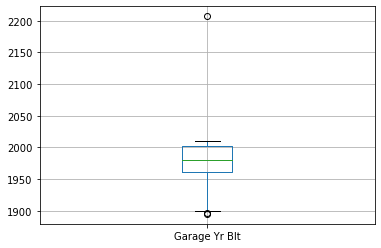

In [4]:
model.data_raw[['Garage Yr Blt']].boxplot()

#### Inspect data for pricing outliers. Using Overall Qual as a hue to help contextualize the plot

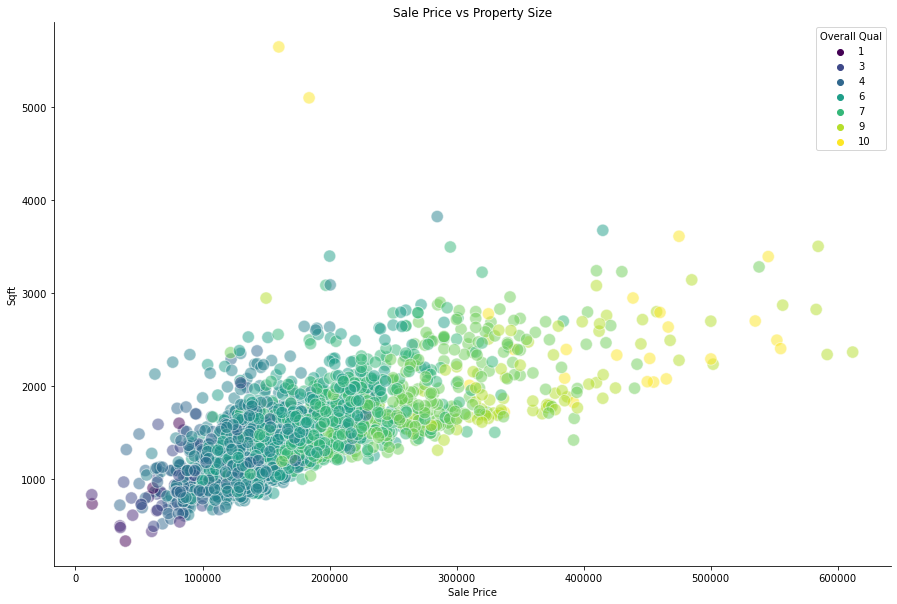

In [5]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=model.data_raw['SalePrice'], y=model.data_raw['Gr Liv Area'], hue=model.data_raw['Overall Qual'], palette='viridis', markers='^', s=150, alpha=.5)
plt.xlabel('Sale Price')
plt.ylabel('Sqft')
plt.title('Sale Price vs Property Size')
sns.despine()
plt.show()

#### It looks like we have a couple of large sqft property features, but the Sale Prices does not align. The two properties are likely outliers, but lets explore further. Will log their Id numbers to drop or impute their outlier data.

#### It should also be noted the clear linear relationship between sqft (Gr Liv Area) and Sale Price. Overall Quality also has a clear progrssion through the hue/scale. We will, of course, explore those relationships (and many more) in more detail.

In [6]:
model.data_raw[model.data_raw['Gr Liv Area'] > 4500]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,...,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1885,2181,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,...,0,0,NaN,NaN,Elev,17000,10,2007,New,183850


In [7]:
model.data_raw[model.data_raw['Gr Liv Area'] > 4500][['Year Built', 'Neighborhood']]

,Year Built,Neighborhood
960,2008,Edwards
1885,2008,Edwards


#### It looks like we have a lot of properties in the neighborhood with Year Built ranging all over the place. Many new homes were built in the 2000s, but that matches the distribution of all our properties

<AxesSubplot:title={'center':"Edwards Neighborhood 'Year Built' Dist"}>

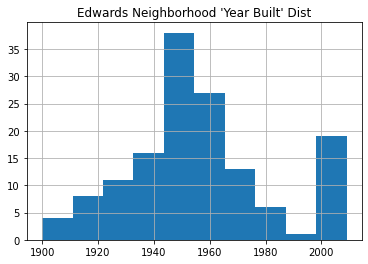

In [8]:
plt.title("Edwards Neighborhood 'Year Built' Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'Edwards']['Year Built'].hist()

<AxesSubplot:title={'center':"All Neighborhoods 'Year Built' Dist"}>

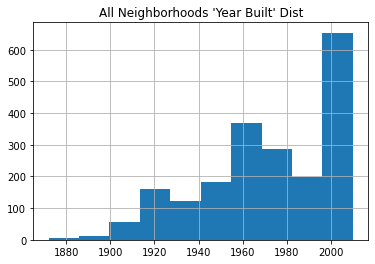

In [9]:
plt.title("All Neighborhoods 'Year Built' Dist")
model.data_raw['Year Built'].hist()

#### Lets look at the mean sale price for 'new homes' by neighborhood

In [10]:
model.data_raw[model.data_raw['Year Built'] > 2000].groupby(by=['Neighborhood']).mean()[['SalePrice', 'Gr Liv Area']]

,SalePrice,Gr Liv Area
Neighborhood,,
Blmngtn,200417.681818,1433.454545
CollgCr,218669.540000,1585.680000
Crawfor,298280.571429,1666.285714
Edwards,168606.842105,1822.000000
Gilbert,197363.000000,1606.981132
Mitchel,205277.777778,1495.777778
NAmes,202000.000000,1449.500000
NoRidge,466500.000000,2633.000000
NridgHt,322831.352459,1944.795082


#### It looks like the sale price is likely accurate, but the square footage is off. Lets impute them as the mean of properties in the same neighborhood of the same age: 1,822sqft

#### Looks like we've cleaned any glaring outliers

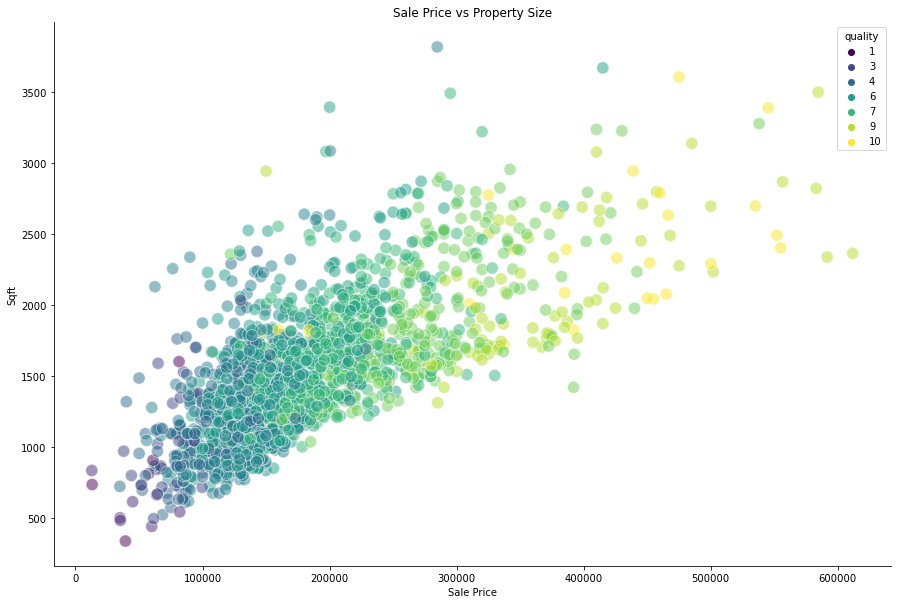

In [11]:
plt.figure(figsize=(15, 10))
sns.scatterplot(x=model.data['price'], y=model.data['gr_living_sqft'], hue=model.data['quality'], palette='viridis', markers='^', s=150, alpha=.5)
plt.xlabel('Sale Price')
plt.ylabel('Sqft')
plt.title('Sale Price vs Property Size')
sns.despine()
plt.show()

#### It looks like there might be some outliers at the low end too..

In [12]:
model.data_raw[model.data_raw['SalePrice'] < 20000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
183,1554,910251050,20,A (agr),80.0,14584,Pave,NaN,Reg,Low,...,0,0,NaN,NaN,NaN,0,2,2008,WD,13100
1628,182,902207130,30,RM,68.0,9656,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,12789


##### Their overall quality metric is VERY low along with their square footage, so maybe the properties are actually priced correctly.

In [13]:
model.data_raw[model.data_raw['SalePrice'] < 20000][['Overall Qual', 'Neighborhood', 'Gr Liv Area']]

,Overall Qual,Neighborhood,Gr Liv Area
183,1,IDOTRR,733
1628,2,OldTown,832


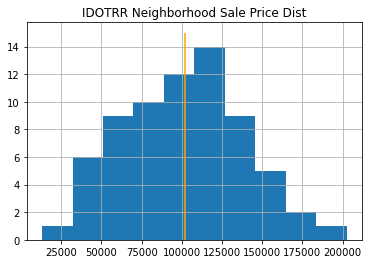

In [14]:
plt.title("IDOTRR Neighborhood Sale Price Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'IDOTRR']['SalePrice'].hist()
plt.vlines(x=model.data_raw[model.data_raw['Neighborhood'] == 'IDOTRR']['SalePrice'].median(), color='orange', ymin=0, ymax=15)

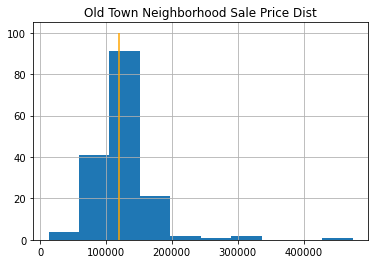

In [15]:
plt.title("Old Town Neighborhood Sale Price Dist")
model.data_raw[model.data_raw['Neighborhood'] == 'OldTown']['SalePrice'].hist()
plt.vlines(x=model.data_raw[model.data_raw['Neighborhood'] == 'OldTown']['SalePrice'].median(), color='orange', ymin=0, ymax=100);

#### The sale price for both properties is ont he low end, but it does fall in line with their Quality score. The IDOTRR & OldTown neighborhoods do have a lower median Sale Price than the full data set.

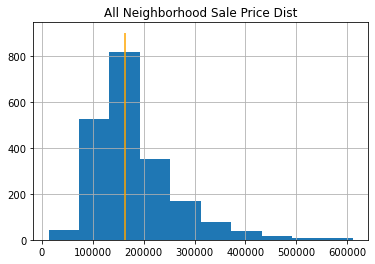

In [16]:
plt.title("All Neighborhood Sale Price Dist")
model.data_raw['SalePrice'].hist()
plt.vlines(x=model.data_raw['SalePrice'].median(), color='orange', ymin=0, ymax=900);

#### Feature Exploration

#### Explore categorical featurs using price per square foot.
#### Price per square foot is a better metric to measure the desirability of a property than 'Sale Price' because it adjusts for the size of a property.

#### Lets explore the affect on Sale Type. It is possible Sale Type (what type of contract was used to sell the proeprty) has some signal to Sale Price.

In [17]:
model.data[['sale_type', 'p_sqft']].groupby(['sale_type']).mean().sort_values(by=['p_sqft'])

,p_sqft
sale_type,
0,99.778025
1,106.054739
2,119.406576
3,122.552827
4,157.438114
5,167.093081


sale_type
0    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
3    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
4    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
5    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

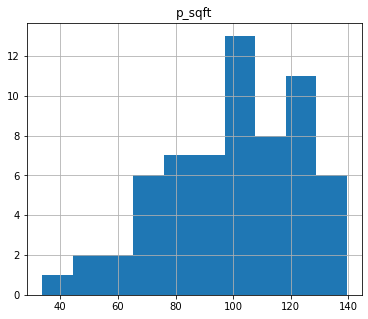

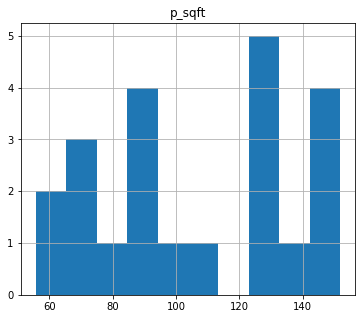

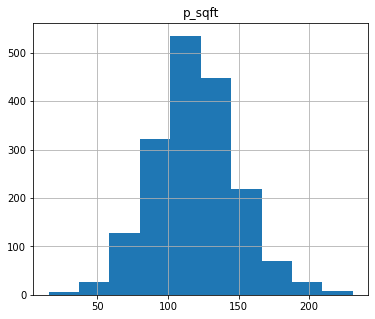

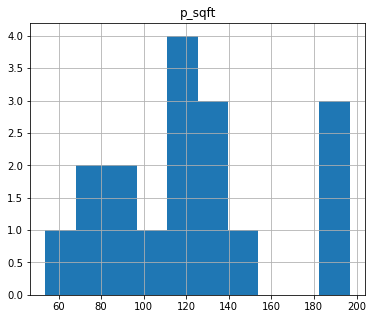

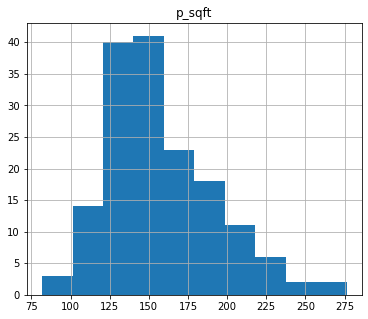

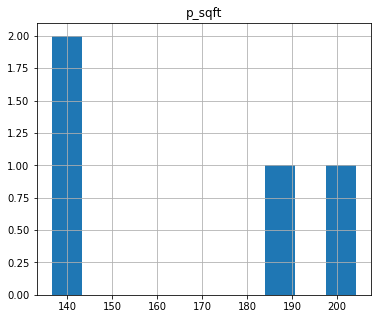

In [18]:
# Sale Type Labels 'COD': 0, 'ConLw': 1, 'ConLD': 1, 'Oth': 2, 'WD ': 2, 'ConLI': 3, 'CWD': 3, 'New': 4, 'Con': 5, 'VWD': 2
model.data[['sale_type', 'p_sqft']].groupby(['sale_type']).hist(column=['p_sqft'], figsize=(6, 5))

There is definitely some ordinal value to Sale Type, but it looks like a couple can be combined, as well. The data dictonary tells us they are very similar types of proeprty sale.

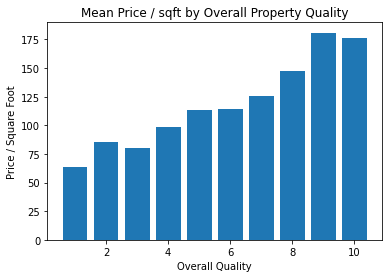

In [19]:
plt.title("Mean Price / sqft by Overall Property Quality")
plt.xlabel('Overall Quality')
plt.ylabel('Price / Square Foot')
plt.bar(x=model.data[['quality', 'p_sqft']].groupby(['quality']).mean()['p_sqft'].index,
height=model.data[['quality', 'p_sqft']].groupby(['quality']).mean()['p_sqft'].values);

#### Overall property quality is clearly highly correlated to Sale Price. It gets a little blurred near the top.

In [20]:
model.data['decade'] = (model.data['year'] / 10).apply(math.floor) * 10

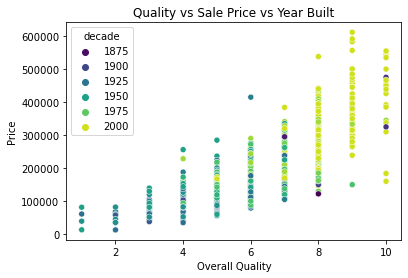

In [21]:
plt.title('Quality vs Sale Price vs Year Built')
plt.xlabel('Overall Quality')
plt.ylabel('Price')
sns.scatterplot(x=model.data['quality'], y=model.data['price'], hue=model.data['decade'], palette='viridis');

#### The age of the property also appears to have a strong relationship to both quality and sales price

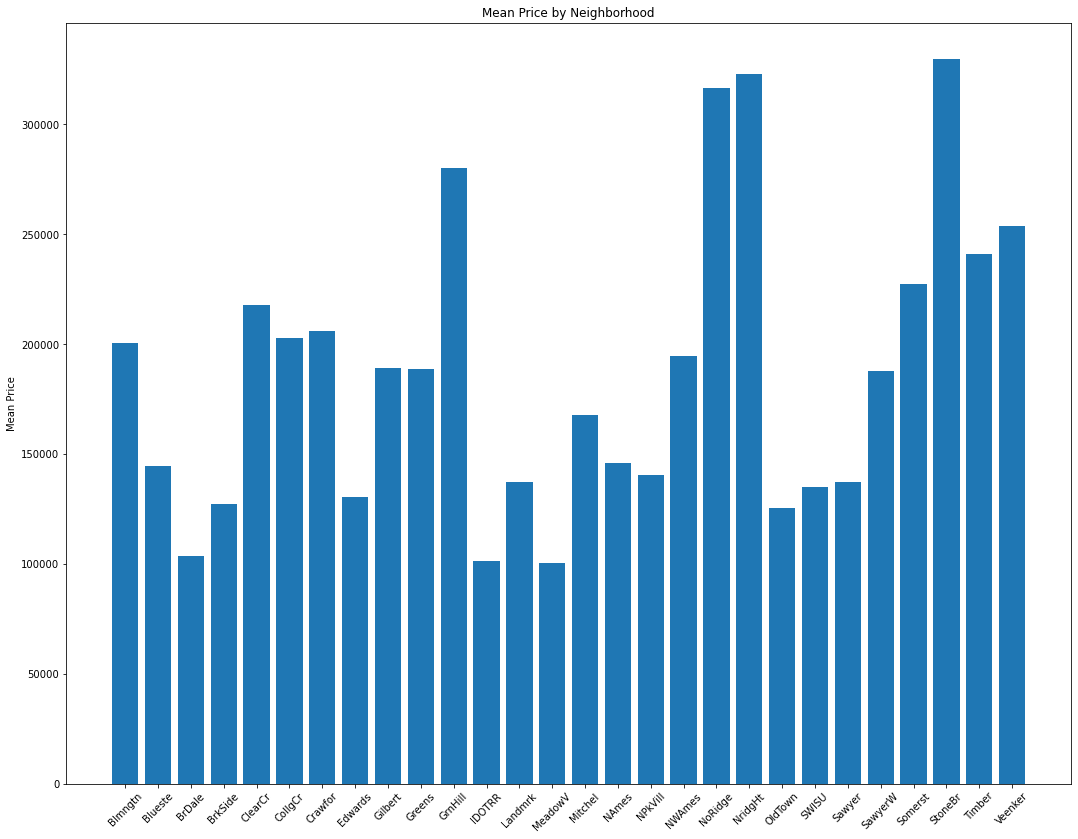

In [22]:
plt.figure(figsize=(18, 14))
plt.title("Mean Price by Neighborhood")
plt.ylabel('Mean Price')
plt.xticks(rotation = 45)
plt.bar(x=model.data_raw[['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).mean()['SalePrice'].index,
height=model.data_raw[['Neighborhood', 'SalePrice']].groupby(['Neighborhood']).mean()['SalePrice'].values);

#### Neighborhoods also appears to have a strong correlation to price.

#### Rinse and repeat this process for many of the categorical variables. The goal is to determine if they are ordinal or nominal. For the sake of space, I will skip through to the end. Categories can be found in the ModelData class above.

#### Misc Features

In [23]:
model.data_raw['Misc Feature'].value_counts()

Shed    56
Gar2     4
Othr     3
TenC     1
Elev     1
Name: Misc Feature, dtype: int64

In [24]:
model.data_raw['Misc Feature'].isna().sum()

1986

##### 1986 NULL values in Misc Features and only 65 entries. Highly unlikely we see any signal from categorizing this data. Dropping it from the dataset. (Especially since the bulk of the entries are sheds, and typically dont drastically affect property value). Small sample size alone, should be enough.

#### Inverse situation is true here, but the result is the same. We have many data entries to look at, but they're essentially all the same. Not a lot of signal can be found here. Dropping. We have another roofing metric that will likely add more signal, so wont be losing much.

In [25]:
model.data_raw['Roof Matl'].value_counts()

CompShg    2025
Tar&Grv      15
WdShngl       5
WdShake       4
Membran       1
ClyTile       1
Name: Roof Matl, dtype: int64

#### Rinse and repeat for a few other categories. They're cleaned and dropped inside the ModelData class.

#### House style

House Style
1.5Fin    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1.5Unf    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
1Story    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.5Fin    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2.5Unf    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
2Story    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SFoyer    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
SLvl      [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

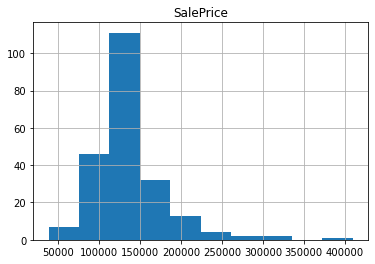

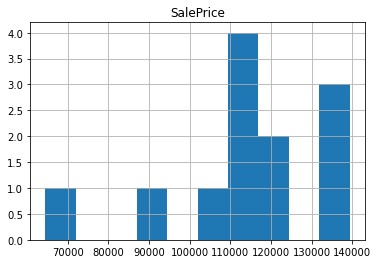

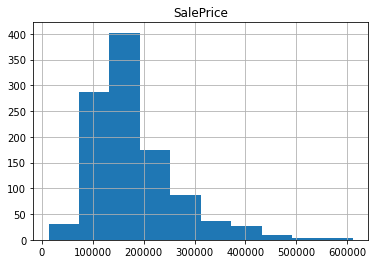

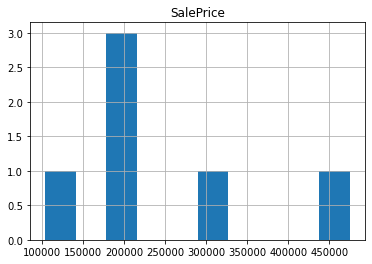

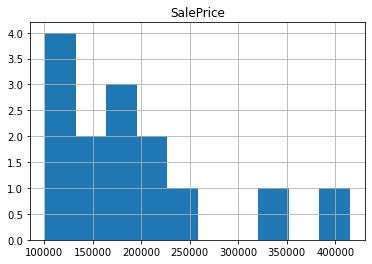

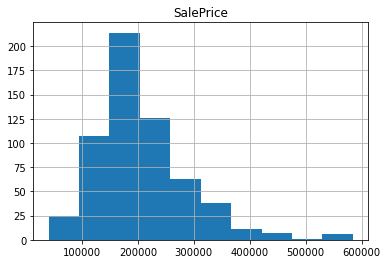

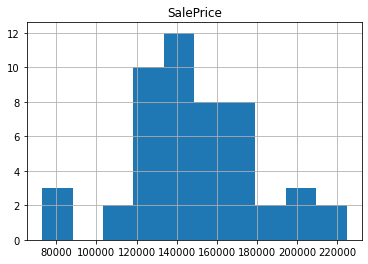

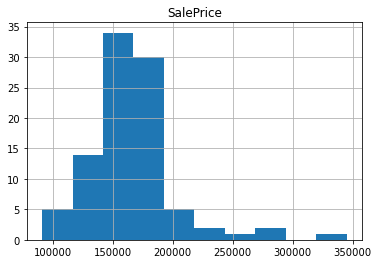

In [26]:
# {'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1}
model.data_raw[['House Style', 'SalePrice']].groupby(by=['House Style']).hist()

##### Decided to group split level and single story properties into one category and 2/2.5 story properties into another.. Was going back and forth between 2 and 3 categories, so I didn't 1/0 the data, instead kept as 1/2. The smaller sample size on the split level homes, despite having lower mean values was the ultimate deciding factor. Clear difference between 1 & 2 story properties. Not a massive difference, but figure it would be best to let normalization techniques sort out that difference.

In [27]:
# {'1.5Fin': 1, '1.5Unf': 1, '1Story': 1, '2.5Fin':2, '2.5Unf':2, '2Story':2, 'SFoyer':1, 'SLvl':1}

In [28]:
model.data_raw.groupby(by=['House Style']).mean()['SalePrice'].sort_values()

House Style
1.5Unf    112466.666667
1.5Fin    136480.091743
SFoyer    149343.920000
SLvl      166248.989362
1Story    179809.194523
2.5Unf    191785.714286
2Story    206408.963211
2.5Fin    243666.666667
Name: SalePrice, dtype: float64

In [29]:
model.data.groupby(['style'])[['p_sqft', 'price']].mean()

,p_sqft,price
style,,
1,126.917579,170701.184927
2,109.755560,206439.417476


style
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: price, dtype: object

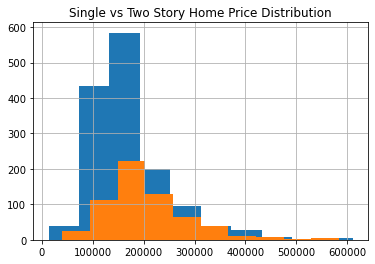

In [30]:
plt.title('Single vs Two Story Home Price Distribution')
model.data.groupby(['style'])['price'].hist()

style
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: p_sqft, dtype: object

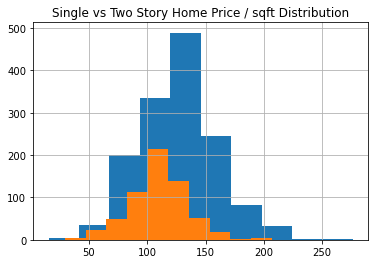

In [31]:
plt.title('Single vs Two Story Home Price / sqft Distribution')
model.data.groupby(['style'])['p_sqft'].hist()